# Introduction

The data provided is from a real airline but the name was changed to Invistico Airlines to maintain its confidentiality.

The data set consists of the details of customers who have already flown with them. Customer comments on various contexts and their flight data have been consolidated.

The main goal with this data set is to predict whether a future customer would be satisfied with your service given the details of the values ​​of other parameters.

Additionally, airlines need to know which aspects of the services they offer should be emphasized more to generate more satisfied customers.echos.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data upload

airlineDF = pd.read_csv(r'C:\Users\OPERADOR\Desktop\cienciadedatos\Invistico_Airline.csv')

In [3]:
airlineDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

We can see that the only categorical columns are satisfaction, Gender, Customer Type, Type of Travel and Class

There are missing values ​​in the Arrival Delay in Minutes column, there are 393 out of 129880, later we will represent the percentage to decide what to do with these values

In [4]:
airlineDF.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [5]:
# Summary statistics for numerical variables
airlineDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [6]:
# Summary statistics for categorical variables

airlineDF.describe(include='object').T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [7]:
airlineDF[['Class']].groupby(['Class']).size()

Class
Business    62160
Eco         58309
Eco Plus     9411
dtype: int64

Here we can see that the only non-binary column is Business with the values ​​Eco, Bussines and Eco Plus

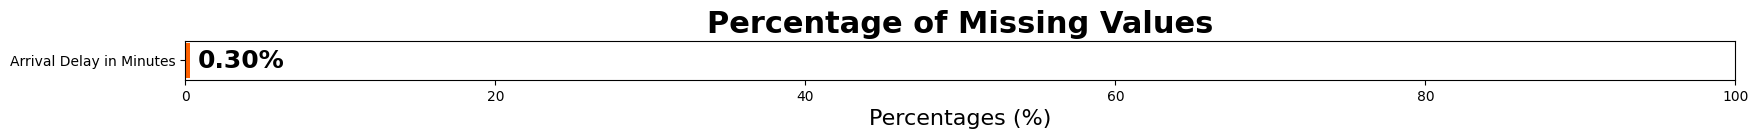

In [8]:
# Calculating the percentage of missing values for each column
missing_data = airlineDF.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / airlineDF.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(20, 0.5))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 100])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()


The catboost model can handle missing values, they are less than 1% so I choose to leave the values ​​as they are to not to contaminate the model information or lose information.

In [9]:
# How many unique values have each variable
airlineDF.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [10]:
## satisfaction column - label encoding 
satisfaction_mapping = {"satisfied": 1, "dissatisfied": 0}
airlineDF['satisfaction'] = airlineDF['satisfaction'].map(satisfaction_mapping) 

## Gender column - label encoding  
gender_mapping = {"Female": 1, "Male": 0}
airlineDF['Gender'] = airlineDF['Gender'].map(gender_mapping) 

## Customer type column - label encoding  
customer_type_mapping = {"Loyal Customer": 1, "disloyal Customer": 0}
airlineDF['Customer Type'] = airlineDF['Customer Type'].map(customer_type_mapping) 

## Type of travel column - label encoding  
travel_type_mapping = {"Business travel": 2, "Personal Travel": 1}
airlineDF['Type of Travel'] = airlineDF['Type of Travel'].map(travel_type_mapping)  

## Class column - label encoding  
class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}
airlineDF['Class'] = airlineDF['Class'].map(class_mapping)  

In [11]:
airlineDF.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [12]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
               'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
               'Inflight wifi service', 'Inflight entertainment', 'Online support',
               'Ease of Online booking', 'On-board service', 'Leg room service',
               'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

target = 'satisfaction'

Counts of each class
satisfaction
1    71087
0    58793
Name: count, dtype: int64


(129880, 23)

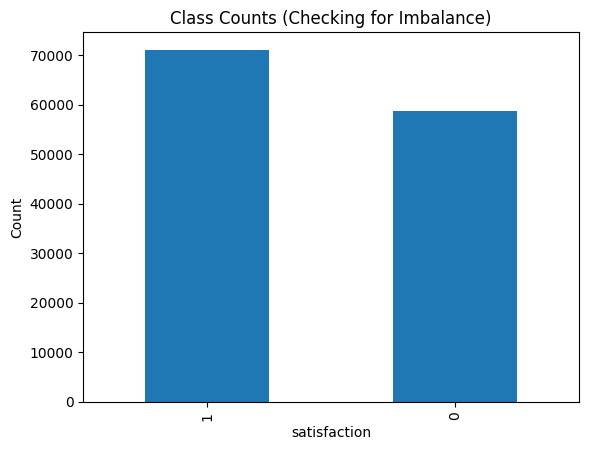

In [13]:
# Look for classes balance

print("Counts of each class")
print(airlineDF[target].value_counts())
airlineDF[target].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts (Checking for Imbalance)')
airlineDF.shape

Classes are almost balanced


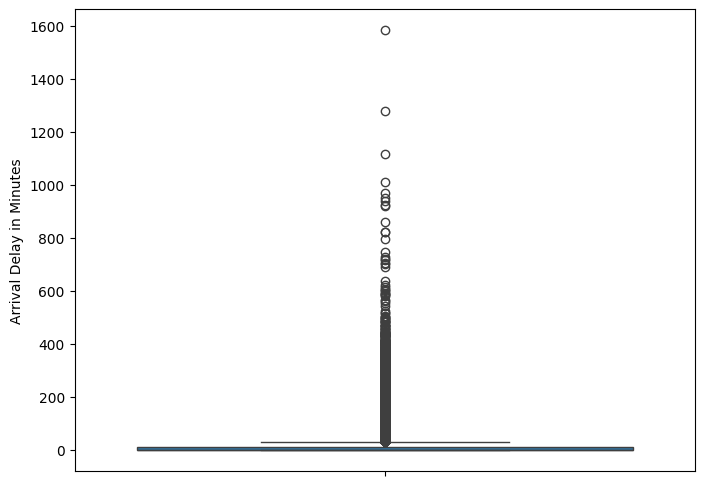

In [14]:
# We have only missing values on "Arrival Delay in Minutes" feature 

fig = plt.figure(figsize=(8,6))
sns.boxplot(airlineDF['Arrival Delay in Minutes']); 
plt.show()

This feature has outliers as well, these outliers do not greatly affect customer satisfaction, as we will see further.


Splitting dataset into train, validation and test

In [15]:
X = airlineDF.drop([target], axis=1) 
y = airlineDF[target]

In [16]:
# Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state= 42) 

In [17]:
# Validation
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [18]:
# You can optimize the iterations, learning rate and also evaluation metrics 

model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.1,
    custom_loss=['Accuracy'],
    eval_metric='Accuracy' 
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    logging_level='Silent'
) 

In [19]:
# test

score = model.score(X_test, y_test)

print("Test score (accuracy): ", round(score, 3))

Test score (accuracy):  0.933


With basic hyperparameters we can get high result 93%, it means the dataset is simple enough

Explainability with Shap, we will see which features have higher impact on accuracy

In [20]:
import shap

In [21]:
explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(X_test)
base_value = explainer.expected_value

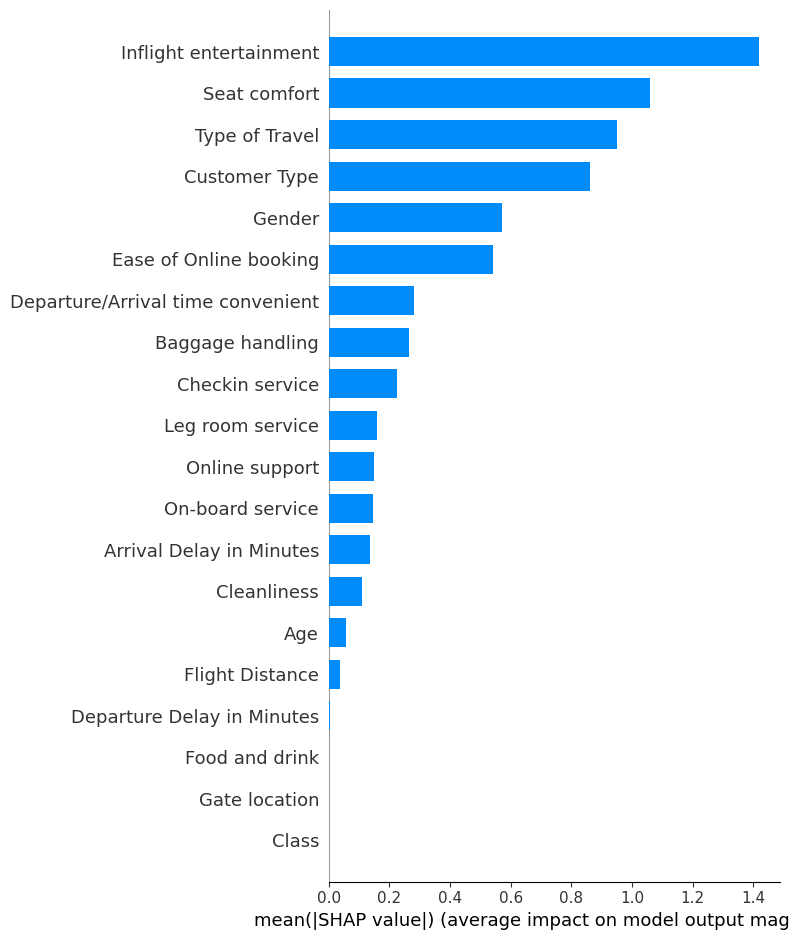

In [22]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

In [23]:
airlineDF['Inflight entertainment'].unique()

array([4, 2, 0, 3, 5, 1], dtype=int64)

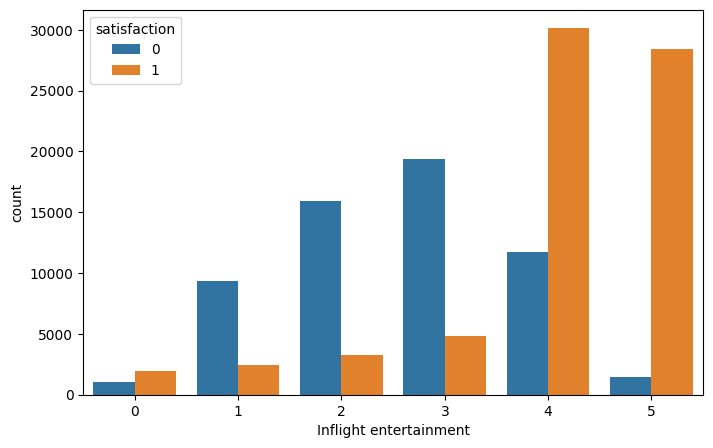

In [24]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Inflight entertainment', hue='satisfaction', data=airlineDF)
plt.show()

<Axes: xlabel='Seat comfort', ylabel='count'>

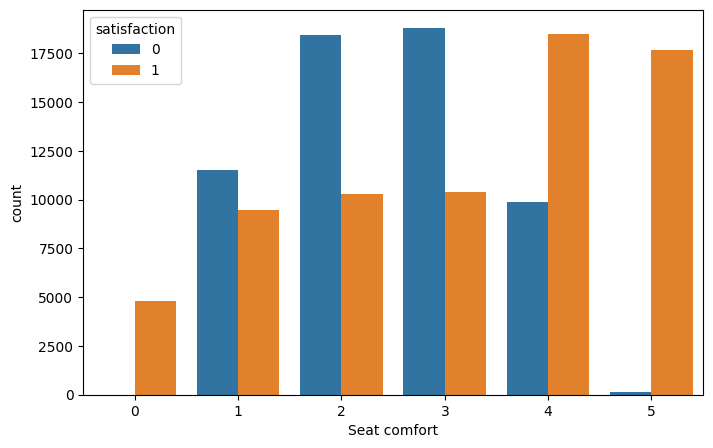

In [25]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Seat comfort', hue='satisfaction', data=airlineDF)



<Axes: xlabel='Type of Travel', ylabel='count'>

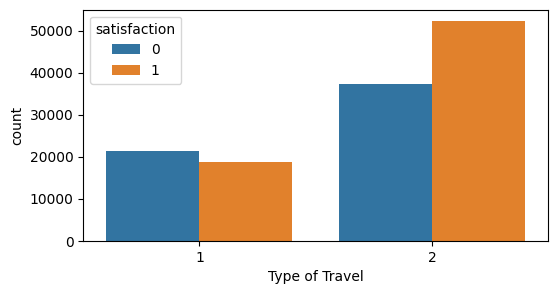

In [26]:

plt.figure(figsize=(6, 3))

sns.countplot(x= 'Type of Travel', hue='satisfaction', data=airlineDF)
# "Business travel": 2, "Personal Travel": 1

<Axes: xlabel='Gender', ylabel='count'>

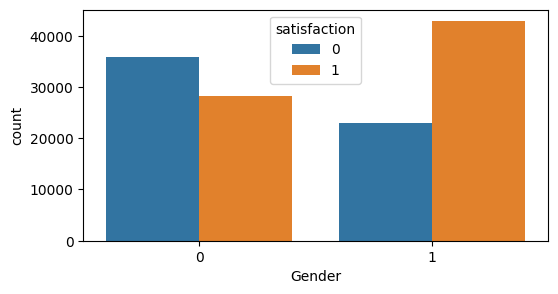

In [27]:
plt.figure(figsize=(6, 3))


sns.countplot(x= 'Gender', hue='satisfaction', data=airlineDF)

# "Female": 1, "Male": 0

<Axes: xlabel='Customer Type', ylabel='count'>

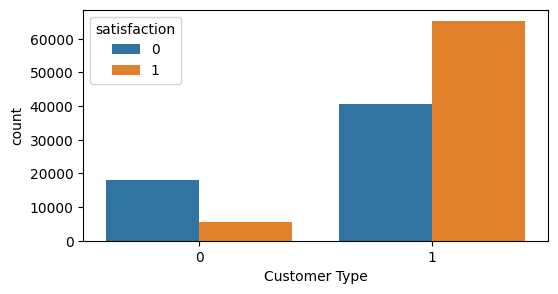

In [28]:
# "Loyal Customer": 1, "disloyal Customer": 0}

plt.figure(figsize=(6, 3))


sns.countplot(x= 'Customer Type', hue='satisfaction', data=airlineDF)

# Conclusion

Looking at the 5 main variables shown, it is possible to get an idea of whether a customer will be satisfied with the airline's service. Furthermore, by studying the information and with the help of the visualization of the data, a marketing campaign can be made to target a specific audiece that matches the range of features discovered and thus obtain more customers satisfied with the services delivered.